In [1]:
from deepface import DeepFace

2023-07-06 10:10:13.194358: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 10:10:13.409401: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-06 10:10:14.123870: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/include:/usr/local/cuda/lib

In [2]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

img_path = '/DATA_17/kjw/sam-hq/images/channel_1.jpeg'

# #face verification
# result = DeepFace.verify(img1_path = img_path, 
#       img2_path = "img2.jpg", 
#       model_name = models[0]
# )

# #face recognition
# dfs = DeepFace.find(img_path = img_path,
#       db_path = "C:/workspace/my_db", 
#       model_name = models[1]
# )

#embeddings
embedding_objs = DeepFace.represent(img_path = img_path, 
      model_name = models[2]
)

2023-07-06 09:23:45.461521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20776 MB memory:  -> device: 0, name: NVIDIA A10, pci bus id: 0000:2b:00.0, compute capability: 8.6
2023-07-06 09:23:55.489074: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200
2023-07-06 09:24:05.581665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [3]:
objs = DeepFace.analyze(img_path = img_path, 
        actions = ['age', 'gender', 'race', 'emotion'],
        detector_backend='retinaface'
)

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


In [4]:
objs

[{'age': 31,
  'region': {'x': 201, 'y': 32, 'w': 71, 'h': 104},
  'gender': {'Woman': 99.62207674980164, 'Man': 0.37792136427015066},
  'dominant_gender': 'Woman',
  'race': {'asian': 99.70000980496465,
   'indian': 0.008037276463010994,
   'black': 2.8318864320594997e-05,
   'white': 0.2077464836610248,
   'middle eastern': 0.0009290575334368572,
   'latino hispanic': 0.08324898577102934},
  'dominant_race': 'asian',
  'emotion': {'angry': 2.0349270945743974,
   'disgust': 9.600435685785353e-07,
   'fear': 3.271731184228133,
   'happy': 0.8827551794204223,
   'sad': 17.288186686526934,
   'surprise': 0.14101686796646523,
   'neutral': 76.38138391860628},
  'dominant_emotion': 'neutral'}]

In [14]:
from PIL import Image

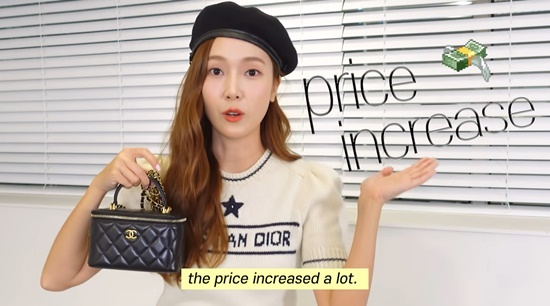

In [31]:
a = Image.open(img_path)
a

In [17]:
a.crop((304, 82, 304+31, 82 +31))

In [12]:
objs[0]

{'age': 35,
 'region': {'x': 304, 'y': 82, 'w': 31, 'h': 31},
 'gender': {'Woman': 6.93662092089653, 'Man': 93.06337833404541},
 'dominant_gender': 'Man',
 'race': {'asian': 22.451348450860287,
  'indian': 0.015245773283047126,
  'black': 0.0005701855910662588,
  'white': 68.17350793919015,
  'middle eastern': 8.93485524862142,
  'latino hispanic': 0.42447329234917713},
 'dominant_race': 'white',
 'emotion': {'angry': 1.08255036175251,
  'disgust': 9.608269908867317e-10,
  'fear': 37.509945034980774,
  'happy': 0.048961176071316004,
  'sad': 49.93354082107544,
  'surprise': 1.9054502331528056e-05,
  'neutral': 11.42498105764389},
 'dominant_emotion': 'sad'}

In [29]:
b = a.crop((187-20, 35-20, 187+97+20, 35 +97+20))
b.save('test_img.png')

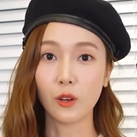

In [32]:
c = Image.open('test_img.png')
c

In [30]:
# b = a.crop((187, 35, 187+97, 35 +97))
objs = DeepFace.analyze(img_path = 'test_img.png', 
        actions = ['age', 'gender', 'race', 'emotion']
)
objs

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]


[{'age': 32,
  'region': {'x': 21, 'y': 22, 'w': 95, 'h': 95},
  'gender': {'Woman': 99.9871015548706, 'Man': 0.01289949577767402},
  'dominant_gender': 'Woman',
  'race': {'asian': 99.87607002258301,
   'indian': 0.017155837849713862,
   'black': 2.0558762514610862e-05,
   'white': 0.02887117152567953,
   'middle eastern': 0.00015806764395165374,
   'latino hispanic': 0.07772364187985659},
  'dominant_race': 'asian',
  'emotion': {'angry': 0.6969835043082838,
   'disgust': 1.6804613039302459e-06,
   'fear': 2.871477201161051,
   'happy': 2.675116567327567,
   'sad': 1.2867443866126997,
   'surprise': 66.95618235542564,
   'neutral': 25.513500036418442},
  'dominant_emotion': 'surprise'}]

In [13]:
objs[1]

{'age': 32,
 'region': {'x': 187, 'y': 35, 'w': 97, 'h': 97},
 'gender': {'Woman': 99.97684359550476, 'Man': 0.023155809321906418},
 'dominant_gender': 'Woman',
 'race': {'asian': 99.45080876350403,
  'indian': 0.04239112604409456,
  'black': 0.00023077027435647324,
  'white': 0.17763420473784208,
  'middle eastern': 0.0032007468689698726,
  'latino hispanic': 0.3257323056459427},
 'dominant_race': 'asian',
 'emotion': {'angry': 4.640122875571251,
  'disgust': 5.497463106962641e-06,
  'fear': 4.859821125864983,
  'happy': 3.0756235122680664,
  'sad': 39.38905596733093,
  'surprise': 15.065060555934906,
  'neutral': 32.970306277275085},
 'dominant_emotion': 'sad'}

(300, 500, 3)


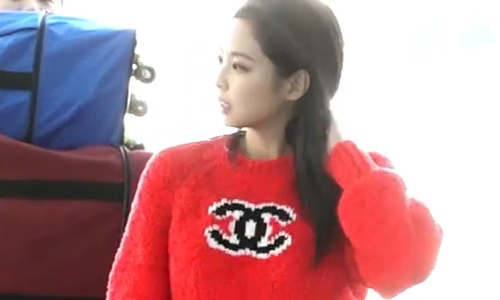

In [81]:
import numpy as np

img_path_2 = '/DATA_17/kjw/sam-hq/images/channel_2.png'

np_img = np.array(Image.open(img_path_2).convert('RGB'))[300:600,800:1300]
print(np_img.shape)

# objs = DeepFace.analyze(img_path = np_img, 
#         actions = ['age', 'gender', 'race', 'emotion']
# )
# print(objs)
Image.fromarray(np_img)

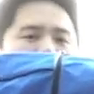

In [67]:
Image.fromarray(np_img[objs[0]['region']['y']:objs[0]['region']['y']+ objs[0]['region']['h'], objs[0]['region']['x']: objs[0]['region']['x']+objs[0]['region']['w']])

In [64]:
objs

[{'age': 29,
  'region': {'x': 384, 'y': 59, 'w': 94, 'h': 94},
  'gender': {'Woman': 0.9790125302970409, 'Man': 99.02099370956421},
  'dominant_gender': 'Man',
  'race': {'asian': 57.42882490158081,
   'indian': 4.20551709830761,
   'black': 0.28123478405177593,
   'white': 14.872631430625916,
   'middle eastern': 7.098729908466339,
   'latino hispanic': 16.11306220293045},
  'dominant_race': 'asian',
  'emotion': {'angry': 5.256387100385082,
   'disgust': 0.007669217489110156,
   'fear': 14.214700664842209,
   'happy': 0.1085066715151574,
   'sad': 61.72835966686721,
   'surprise': 0.07696367437145703,
   'neutral': 18.607417477061446},
  'dominant_emotion': 'sad'}]

In [7]:
import pickle 
with open('/DATA_STORAGE/DATASET/Montage_data/train/montage_data.pkl', 'rb') as f:
    a = pickle.load(f)

In [15]:
a.keys()

dict_keys(['ids', 'file_info'])

In [5]:
img_path = '/DATA_17/DATASET/Montage_data/train/image/1005.png'
img_path = img_path.replace('DATA_17', 'DATA_STORAGE')

In [4]:
img_path

'/DATA_17/DATASET/Montage_data/train/image/1005.png'

In [6]:
img_path

'/DATA_STORAGE/DATASET/Montage_data/train/image/1005.png'

In [16]:
for i in a['file_info']:
    print(i)
    break

{'f_id': '20', 'gender': 'M', 'age': 20, 'img_path': '/DATA_STORAGE/DATASET/Montage_data/train/image/20.png'}


In [33]:
a = {'gender': {'Woman': 1.5178480185568333, 'Man': 98.48214983940125}}

In [38]:
max(a['gender'], key=a['gender'].get)

'Man'

0

In [8]:
import pickle 
with open('./tmp.pkl', 'rb') as f:
    a = pickle.load(f)

In [11]:
pkl_list

['./tmp_60.pkl',
 './tmp_80.pkl',
 './tmp_140.pkl',
 './tmp_100.pkl',
 './tmp_120.pkl',
 './tmp_20.pkl',
 './tmp_40.pkl']

In [13]:
a.keys()

dict_keys(['ids', 'gender_true', 'gender_pred', 'age_true', 'age_pred'])

In [92]:
import glob
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score


pkl_list = glob.glob('./tmp_*.pkl')
gen_t = []
gen_pred = []
age_t = []
age_pred = []
indices = []
for pkl_file in pkl_list:
    with open(pkl_file, 'rb') as f:
        tmp_file = pickle.load(f)
    indices.extend(tmp_file['ids'])
    gen_t.extend(tmp_file['gender_true'])
    gen_pred.extend(tmp_file['gender_pred'])
    age_t.extend(tmp_file['age_true'])
    age_pred.extend(tmp_file['age_pred'])
    

In [93]:
print("분류 결과표: \n", confusion_matrix(gen_t, gen_pred, labels=['M', 'F']))
print("정확도(accuracy): ", accuracy_score(gen_t, gen_pred))

분류 결과표: 
 [[1287    5]
 [   7    1]]
정확도(accuracy):  0.9907692307692307


In [94]:
print("class: 'M' 에 대한 정밀도(precision): ", precision_score(gen_t, gen_pred, pos_label='M'))
print("class: 'M' 에 대한 재현율(recall): ", recall_score(gen_t, gen_pred, pos_label='M'))
print("class: 'M' 에 대한 F1-score: ", f1_score(gen_t, gen_pred, pos_label='M'))

class: 'M' 에 대한 정밀도(precision):  0.9945904173106646
class: 'M' 에 대한 재현율(recall):  0.9961300309597523
class: 'M' 에 대한 F1-score:  0.9953596287703016


In [95]:
print("multi-class에 대한 종합 결과: \n", classification_report(gen_t, gen_pred))
print("multi-class에 대한 정밀도(precision): ", precision_score(gen_t, gen_pred, average='micro'))
print("multi-class에 대한 재현율(recall): ", recall_score(gen_t, gen_pred, average='micro'))
print("multi-class에 대한 f1-score (가중치 X): ", f1_score(gen_t, gen_pred, average='micro'))

multi-class에 대한 종합 결과: 
               precision    recall  f1-score   support

           F       0.17      0.12      0.14         8
           M       0.99      1.00      1.00      1292

    accuracy                           0.99      1300
   macro avg       0.58      0.56      0.57      1300
weighted avg       0.99      0.99      0.99      1300

multi-class에 대한 정밀도(precision):  0.9907692307692307
multi-class에 대한 재현율(recall):  0.9907692307692307
multi-class에 대한 f1-score (가중치 X):  0.9907692307692307
